<a href="https://colab.research.google.com/github/KarenYu729/Pytorch-Note/blob/note/pytorch_learning_note2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In [6]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
torch.manual_seed(1)    # reproducible

# torch.manual_seed(seed) 功能描述

# 设置 CPU 生成随机数的 种子 ，方便下次复现实验结果。

# 为 CPU 设置 种子 用于生成随机数，以使得结果是确定的。

# 当你设置一个随机种子时，接下来的随机算法生成数根据当前的随机种子按照一定规律生成。
# 随机种子作用域是在设置时到下一次设置时。要想重复实验结果，设置同样随机种子即可。

torch.linspace(start, end, steps=100, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
函数的作用是，返回一个一维的tensor（张量），这个张量包含了从start到end（包括端点）的等距的steps个数据点。
</br></br>
常用的几个参数含义：

start：开始值

end：结束值

steps：分割的点数，默认是100

dtype：返回值（张量）的数据类型

In [3]:
torch.linspace(-1, 1, 100)

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00



---



先看torch.squeeze() 这个函数主要对数据的维度进行压缩，去掉维数为1的的维度，比如是一行或者一列这种，一个一行三列（1,3）的数去掉第一个维数为一的维度之后就变成（3）行。squeeze(a)就是将a中所有为1的维度删掉。不为1的维度没有影响。a.squeeze(N) 就是去掉a中指定的维数为一的维度。还有一种形式就是b=torch.squeeze(a，N) a中去掉指定的定的维数为一的维度。
</br></br>
再看torch.unsqueeze()这个函数主要是对数据维度进行扩充。给指定位置加上维数为一的维度，比如原本有个三行的数据（3），在0的位置加了一维就变成一行三列（1,3）。a.squeeze(N) 就是在a中指定位置N加上一个维数为1的维度。还有一种形式就是b=torch.squeeze(a，N) a就是在a中指定位置N加上一个维数为1的维度。

</br></br>
torch.unsqueeze 详解
torch.unsqueeze(input, dim, out=None)

作用：扩展维度
返回一个新的张量，对输入的既定位置插入维度 1

注意： 返回张量与输入张量共享内存，所以改变其中一个的内容会改变另一个。
如果dim为负，则将会被转化dim+input.dim()+1

</br>

参数:
tensor (Tensor) – 输入张量

dim (int) – 插入维度的索引

out (Tensor, optional) – 结果张量

In [5]:
torch.unsqueeze(torch.linspace(-1, 1, 100), dim=0)

tensor([[-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
         -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
         -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
         -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
         -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
         -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
         -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
          0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
          0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
          0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
          0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
          0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
          0.9394,  0.9596,  

In [4]:
torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.



---
**torch.rand和torch.randn有什么区别？** 

一个均匀分布，一个是标准正态分布。

在区间上得到一个由均匀分布的随机数填充的张量

torch.rand(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) → Tensor
Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)[0,1)

The shape of the tensor is defined by the variable argument size.

Parameters:
size (int...) – a sequence of integers defining the shape of the output tensor. Can be a variable number of arguments or a collection like a list or tuple.

Keyword Arguments:
generator (torch.Generator, optional) – a pseudorandom number generator for sampling

out (Tensor, optional) – the output tensor.

dtype (torch.dtype, optional) – the desired data type of returned tensor. Default: if None, uses a global default (see torch.set_default_tensor_type()).

layout (torch.layout, optional) – the desired layout of returned Tensor. Default: torch.strided.

device (torch.device, optional) – the desired device of returned tensor. Default: if None, uses the current device for the default tensor type (see torch.set_default_tensor_type()). device will be the CPU for CPU tensor types and the current CUDA device for CUDA tensor types.

requires_grad (bool, optional) – If autograd should record operations on the returned tensor. Default: False.

pin_memory (bool, optional) – If set, returned tensor would be allocated in the pinned memory. Works only for CPU tensors. Default: False.


In [8]:
torch.rand(4)

tensor([0.7576, 0.2793, 0.4031, 0.7347])

In [9]:
torch.rand(2, 3)

tensor([[0.0293, 0.7999, 0.3971],
        [0.7544, 0.5695, 0.4388]])

pow()方法返回 （x 的 y 次方） 的值

In [10]:
print(pow(2,3))

8


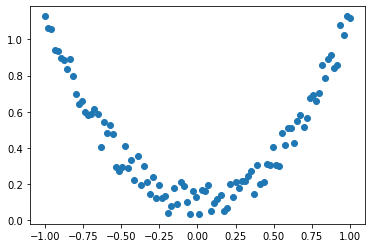

In [11]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### 创建网络模型

torch.nn是包含了构筑神经网络结构基本元素的包，在这个包中，可以找到任意的神经网络层。这些神经网络层都是nn.Module这个大类的子类。torch.nn.Linear就是神经网络中的线性层，可以实现形如y=Xweight^T+b的加和功能。

**注意：**</br>
1）nn.Linear是一个类，使用时进行类的实例化

2）实例化的时候，nn.Linear需要输入两个参数，in_features为上一层神经元的个数，out_features为这一层的神经元个数

3）不需要定义w和b。所有nn.Module的子类，形如nn.XXX的层，都会在实例化的同时随机生成w和b的初始值。所以实例化之后，我们就可以调用属性weight和bias来查看生成的w和b。其中w是必然会生成的，b是我们可以控制是否要生成的。在nn.Linear类中，有参数bias，默认 bias = True。如果我们希望不拟合常量b，在实例化时将参数bias设置为False即可。

4）由于w和b是随机生成的，所以同样的代码多次运行后的结果是不一致的。如果我们希望控制随机性，则可以使用torch中的random类。如：torch.random.manual_seed(420) #人为设置随机数种子

5）由于不需要定义常量b，因此在特征张量中，不需要留出与常数项相乘的那一列，只需要输入特征张量。

6）输入层只有一层，并且输入层的结构（神经元的个数）由输入的特征张量X决定，因此在PyTorch中构筑神经网络时，不需要定义输入层。

7）实例化之后，将特征张量输入到实例化后的类中。
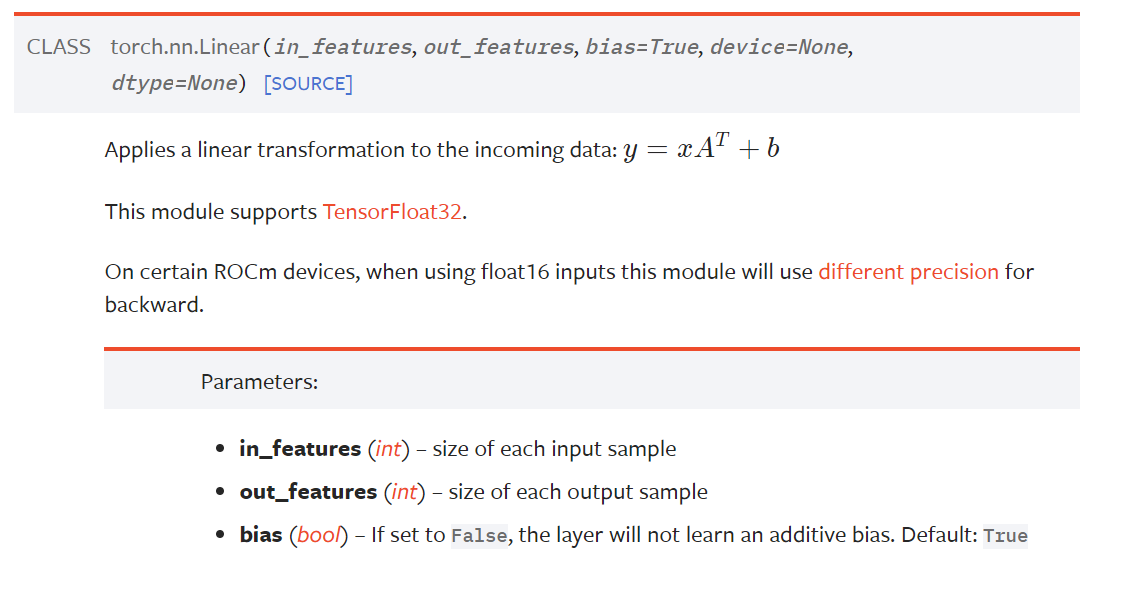

In [12]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

实例化类

In [13]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


grad

In [14]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()：将 figure 设置为交互模式，figure 不用 plt.show() 也可以显示。
</br></br>
plt.ioff()：将 figure 设置为阻塞模式，也是 figure 的默认模式，figure 必须用 plt.show() 才能显示。
</br></br>
plt.show()：显示所有的 figure（不管是阻塞模式的还是交互模式的）。若一个 figure 下一个 plt.show()，则只有关闭一个 figure，才会出现下一个 figure。若最后设置 plt.show()，则会显示设置的所有 figure。


In [15]:
plt.ion()   # something about plotting

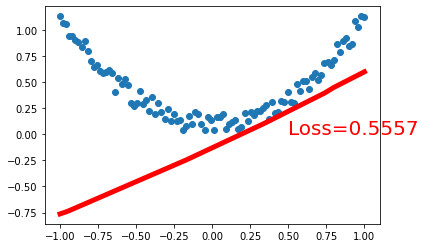

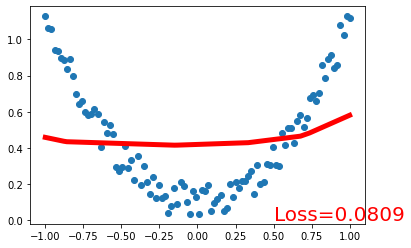

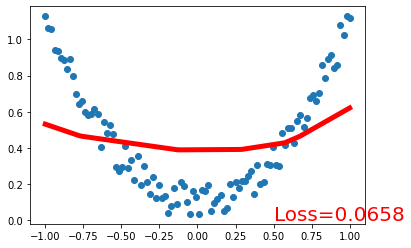

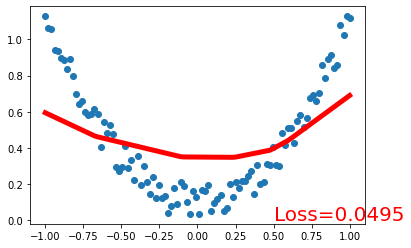

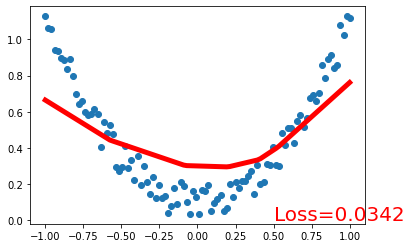

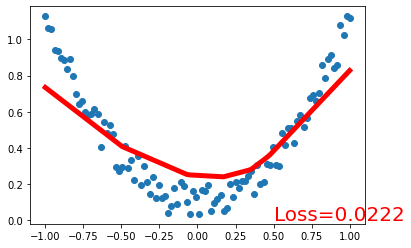

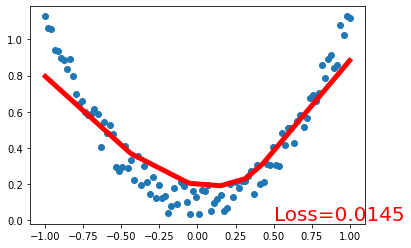

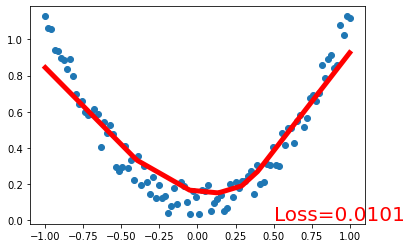

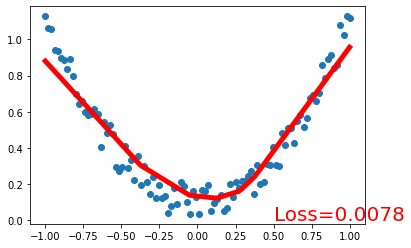

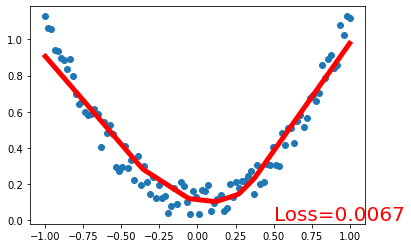

In [16]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

</br></br>
# Classification

In [34]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

### 数据准备



---
**torch.ones**

用来将tensor中元素值全置为1

In [35]:
torch.ones(10, 2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])



---
**torch.normal**

该函数原型如下：

normal(mean, std, *, generator=None, out=None)

我们从一个标准正态分布N～(0,1)，提取一个2x2的矩阵

In [36]:
torch.normal(mean=0.,std=1.,size=(5,2))

tensor([[ 0.6614,  0.2669],
        [ 0.0617,  0.6213],
        [-0.4519, -0.1661],
        [-1.5228,  0.3817],
        [-1.0276, -0.5631]])



---
**torch.zeros**

用来将tensor中元素值全置为0

In [37]:
torch.zeros(100)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

n_data:  torch.Size([100, 2]) tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]

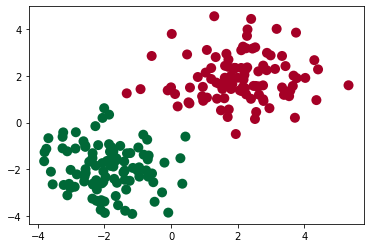

In [38]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

print('n_data: ', n_data.size(), n_data)
print('x0: ', x0.size(), x0)
print('x1: ', x1.size(), x1)
print('y0: ', y0.size(), y0)
print('y1: ', y1.size(), y1)
print('x\n', x.size(), x)
print('y\n', y.size(), y)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
print('-----variable----')
print('x\n', x)
print('y\n', y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

### 构建网络模型

In [39]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [40]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [41]:
plt.ion()   # something about plotting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


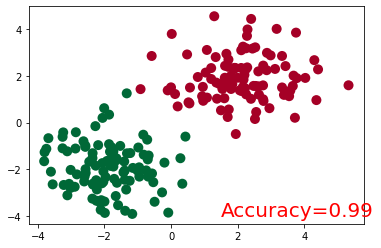

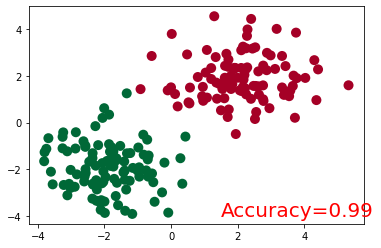

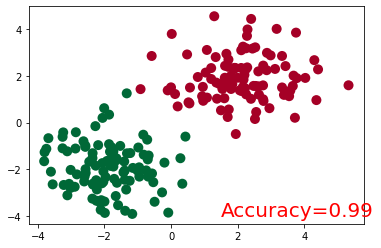

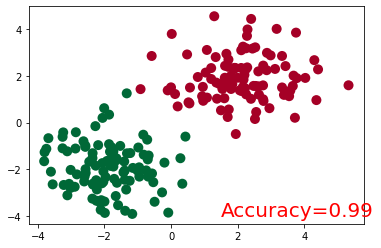

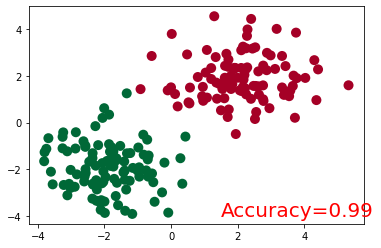

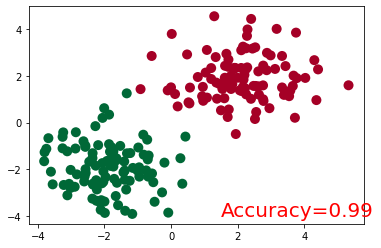

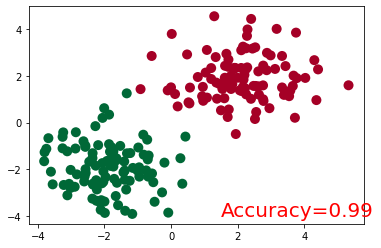

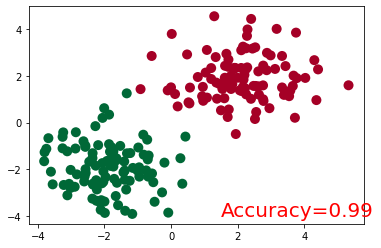

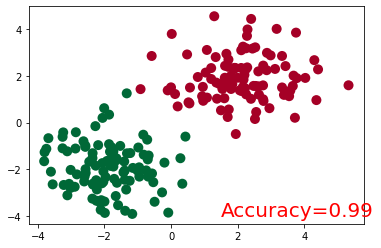

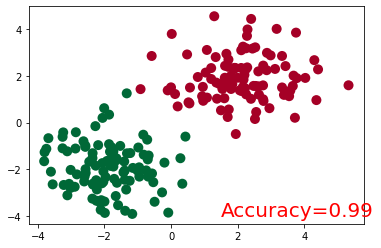

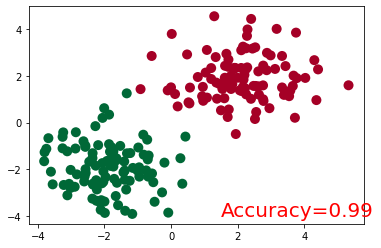

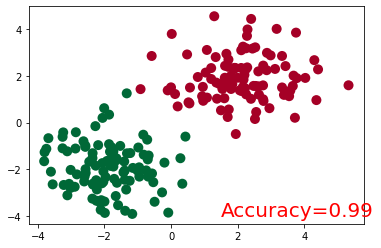

In [43]:
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

</br></br>

# Build NN Quickly

In [44]:
import torch
import torch.nn.functional as F

In [45]:
# replace following class code with an easy sequential network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [46]:
net1 = Net(1, 10, 1)
print(net1)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [47]:
# easy and fast way to build your network
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
print(net2)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


</br></br>

# Save and Reload

In [ ]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

**generate data**

In [48]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [49]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

In [50]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [51]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

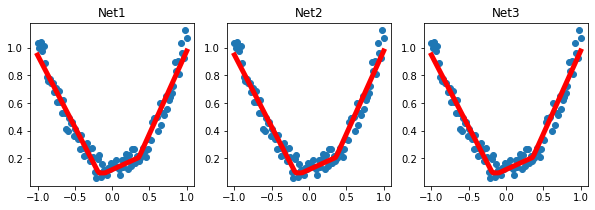

In [52]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()

</br></br>

# Batch Train

In [55]:
import torch
import torch.utils.data as Data

torch.manual_seed(1)    # reproducible

In [56]:
BATCH_SIZE = 5
# BATCH_SIZE = 8

In [57]:
x = torch.linspace(1, 10, 10)       # this is x data (torch tensor)
y = torch.linspace(10, 1, 10)       # this is y data (torch tensor)
print(x)
print(y)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])




---
Data.TensorDataset

torch_dataset=Data.TensorDataset(data_tensor=x,target_tensor=y)
</br></br>
TensorDataset 可以用来对 tensor 进行打包，就好像 python 中的 zip 功能。该类通过每一个 tensor 的第一个维度进行索引。因此，该类中的 tensor 第一维度必须相等. 另外：TensorDataset 中的参数必须是 tensor


In [53]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = torch.tensor([44, 55, 66, 44, 55, 66, 44, 55, 66, 44, 55, 66])
train_ids = TensorDataset(a, b) 
# 切片输出
print(train_ids[0:2])
print('=' * 80)
# 循环取数据
for x_train, y_label in train_ids:
    print(x_train, y_label)
# DataLoader进行数据封装
print('=' * 80)
train_loader = DataLoader(dataset=train_ids, batch_size=4, shuffle=True)
for i, data in enumerate(train_loader, 1):  # 注意enumerate返回值有两个,一个是序号，一个是数据（包含训练数据和标签）
    x_data, label = data
    print(' batch:{0} x_data:{1}  label: {2}'.format(i, x_data, label))


(tensor([[1, 2, 3],
        [4, 5, 6]]), tensor([44, 55]))
tensor([1, 2, 3]) tensor(44)
tensor([4, 5, 6]) tensor(55)
tensor([7, 8, 9]) tensor(66)
tensor([1, 2, 3]) tensor(44)
tensor([4, 5, 6]) tensor(55)
tensor([7, 8, 9]) tensor(66)
tensor([1, 2, 3]) tensor(44)
tensor([4, 5, 6]) tensor(55)
tensor([7, 8, 9]) tensor(66)
tensor([1, 2, 3]) tensor(44)
tensor([4, 5, 6]) tensor(55)
tensor([7, 8, 9]) tensor(66)
 batch:1 x_data:tensor([[1, 2, 3],
        [7, 8, 9],
        [7, 8, 9],
        [4, 5, 6]])  label: tensor([44, 66, 66, 55])
 batch:2 x_data:tensor([[7, 8, 9],
        [4, 5, 6],
        [7, 8, 9],
        [4, 5, 6]])  label: tensor([66, 55, 66, 55])
 batch:3 x_data:tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [1, 2, 3]])  label: tensor([44, 55, 44, 44])




---
Data.DataLoader

DataLoader就是用来包装所使用的数据，每次抛出一批数据

pytorch中data.DataLoader类实现数据的迭代。参数如下：

dataset：（数据类型 dataset）</br>
输入的数据类型,这里是原始数据的输入。PyTorch内也有这种数据结构。

batch_size：（数据类型 int）</br>
批训练数据量的大小，根据具体情况设置即可（默认：1）。PyTorch训练模型时调用数据不是一行一行进行的（这样太没效率），而是一捆一捆来的。这里就是定义每次喂给神经网络多少行数据，如果设置成1，那就是一行一行进行（个人偏好，PyTorch默认设置是1）。每次是随机读取大小为batch_size。如果dataset中的数据个数不是batch_size的整数倍，这最后一次把剩余的数据全部输出。若想把剩下的不足batch size个的数据丢弃，则将drop_last设置为True，会将多出来不足一个batch的数据丢弃。

shuffle：（数据类型 bool）</br>
洗牌。默认设置为False。在每次迭代训练时是否将数据洗牌，默认设置是False。将输入数据的顺序打乱，是为了使数据更有独立性，但如果数据是有序列特征的，就不要设置成True了。

batch_sampler：（数据类型 Sampler）</br>
批量采样，默认设置为None。但每次返回的是一批数据的索引（注意：不是数据）。其和batch_size、shuffle 、sampler and drop_last参数是不兼容的。我想，应该是每次输入网络的数据是随机采样模式，这样能使数据更具有独立性质。所以，它和一捆一捆按顺序输入，数据洗牌，数据采样，等模式是不兼容的。

sampler：（数据类型 Sampler）</br>
采样，默认设置为None。根据定义的策略从数据集中采样输入。如果定义采样规则，则洗牌（shuffle）设置必须为False。

num_workers：（数据类型 Int）</br>
工作者数量，默认是0。使用多少个子进程来导入数据。设置为0，就是使用主进程来导入数据。注意：这个数字必须是大于等于0的，负数估计会出错。

pin_memory：（数据类型 bool）</br>
内存寄存，默认为False。在数据返回前，是否将数据复制到CUDA内存中。

drop_last：（数据类型 bool）</br>
丢弃最后数据，默认为False。设置了 batch_size 的数目后，最后一批数据未必是设置的数目，有可能会小些。这时你是否需要丢弃这批数据。

timeout：（数据类型 numeric）</br>
超时，默认为0。是用来设置数据读取的超时时间的，但超过这个时间还没读取到数据的话就会报错。 所以，数值必须大于等于0。

In [54]:
import torch
import torch.utils.data as Data
BATCH_SIZE = 5
# linspace, 生成1到10的10个数构成的等差数列
x = torch.linspace(1, 10, 10)
y = torch.linspace(10, 1, 10)

# 把数据放在数据库中
torch_dataset = Data.TensorDataset(x, y)
# 从数据库中每次抽出batch size个样本
loader = Data.DataLoader(dataset=torch_dataset,
                         batch_size=BATCH_SIZE, # x, y 是相差为1个数为10的等差数列, batch= 5, 遍历loader就只有两个数据
                         shuffle=False, # 不打乱顺序,便于查看
                         num_workers=0)

def show_batch():
    #for epoch in range(10):
    for step, (batch_x, batch_y) in enumerate(loader):
        # training
        print("steop:{}, batch_x:{}, batch_y:{}".format(step, batch_x, batch_y)) #方便输出

if __name__ == '__main__':
    show_batch()

steop:0, batch_x:tensor([1., 2., 3., 4., 5.]), batch_y:tensor([10.,  9.,  8.,  7.,  6.])
steop:1, batch_x:tensor([ 6.,  7.,  8.,  9., 10.]), batch_y:tensor([5., 4., 3., 2., 1.])


In [59]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

In [60]:
for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [5. 3. 1. 7. 9.] | batch y:  [ 6.  8. 10.  4.  2.]
Epoch:  0 | Step:  1 | batch x:  [ 8. 10.  2.  6.  4.] | batch y:  [3. 1. 9. 5. 7.]
Epoch:  1 | Step:  0 | batch x:  [5. 9. 2. 6. 1.] | batch y:  [ 6.  2.  9.  5. 10.]
Epoch:  1 | Step:  1 | batch x:  [ 3.  4.  7. 10.  8.] | batch y:  [8. 7. 4. 1. 3.]
Epoch:  2 | Step:  0 | batch x:  [6. 9. 4. 8. 7.] | batch y:  [5. 2. 7. 3. 4.]
Epoch:  2 | Step:  1 | batch x:  [10.  3.  2.  1.  5.] | batch y:  [ 1.  8.  9. 10.  6.]


**Suppose a different batch size that cannot be fully divided by the number of data entreis:**

In [61]:
BATCH_SIZE = 8
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)
for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [ 3.  4.  1.  5.  8.  9. 10.  7.] | batch y:  [ 8.  7. 10.  6.  3.  2.  1.  4.]
Epoch:  0 | Step:  1 | batch x:  [2. 6.] | batch y:  [9. 5.]
Epoch:  1 | Step:  0 | batch x:  [ 4. 10.  7.  3.  9.  5.  2.  8.] | batch y:  [7. 1. 4. 8. 2. 6. 9. 3.]
Epoch:  1 | Step:  1 | batch x:  [6. 1.] | batch y:  [ 5. 10.]
Epoch:  2 | Step:  0 | batch x:  [10.  3.  5.  8.  4.  2.  9.  1.] | batch y:  [ 1.  8.  6.  3.  7.  9.  2. 10.]
Epoch:  2 | Step:  1 | batch x:  [6. 7.] | batch y:  [5. 4.]


</br></br>
# Optimizers

同样的网络使用不同的optimizer

In [62]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [63]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

**generate data**

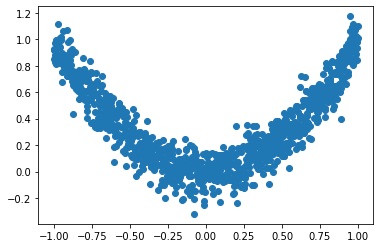

In [64]:
# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [65]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

**generate network**

In [66]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

**实例化，创建4个网络，分别使用不同的optimizer**

In [67]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [68]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [69]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


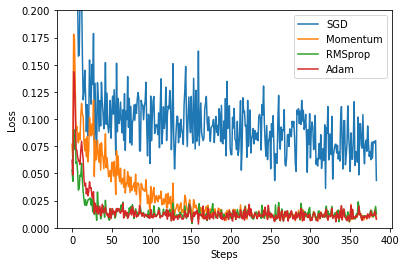

In [70]:
# training
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):          # for each training step
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.item())     # loss recoder

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()